In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
trainCsv = pd.read_csv("train.csv")

In [3]:
trainCsv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
trainCsv.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
trainCsv = trainCsv[['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']]

In [6]:
trainCsv

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,0,2008,WD,Normal,208500
1,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,0,0,2007,WD,Normal,181500
2,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,0,2008,WD,Normal,223500
3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,0,2006,WD,Abnorml,140000
4,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,0,0,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,460,TA,TA,Y,0,0,2007,WD,Normal,175000
1456,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,500,TA,TA,Y,0,0,2010,WD,Normal,210000
1457,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,252,TA,TA,Y,0,0,2010,WD,Normal,266500
1458,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,240,TA,TA,Y,0,0,2010,WD,Normal,142125


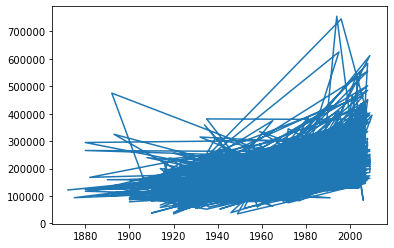

In [7]:
plt.plot(trainCsv["YearBuilt"], trainCsv["SalePrice"])

In [8]:
grouped = trainCsv.groupby(by = "YearBuilt").mean()

Text(0.5, 1.0, 'Year of house built vs. Sales Price')

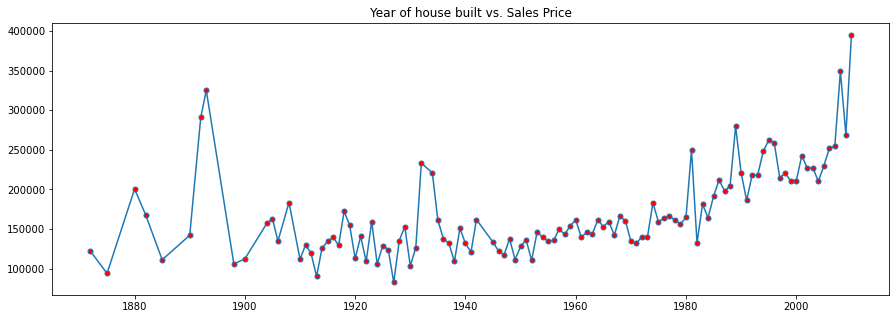

In [9]:
plt.figure(figsize=(15,5))
plt.plot(grouped.index, grouped["SalePrice"], marker = ".", markersize = 10, markerfacecolor = "red")
plt.title("Year of house built vs. Sales Price")

In [10]:
#HW:
# analyze dataset and group by yearbuilt
#set and reset index without the column being lost ---
#atleast 2 graphs, groupings, for range of the years
#ex. input ranges, and it will give the graph for it (include the title)
#analyze between area and salesPrice too
#give conclusion of what info you can find after analyzing the data
#revise concepts

In [14]:
trainCsv.reset_index(inplace = True)

In [15]:
trainCsv

,level_0,index,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,548,TA,TA,Y,0,0,2008,WD,Normal,208500
1,1,1,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,460,TA,TA,Y,0,0,2007,WD,Normal,181500
2,2,2,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,608,TA,TA,Y,0,0,2008,WD,Normal,223500
3,3,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,642,TA,TA,Y,0,0,2006,WD,Abnorml,140000
4,4,4,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,836,TA,TA,Y,0,0,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,460,TA,TA,Y,0,0,2007,WD,Normal,175000
1456,1456,1456,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,500,TA,TA,Y,0,0,2010,WD,Normal,210000
1457,1457,1457,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,252,TA,TA,Y,0,0,2010,WD,Normal,266500
1458,1458,1458,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,240,TA,TA,Y,0,0,2010,WD,Normal,142125


In [16]:
trainCsv = trainCsv.drop('level_0', axis = 1)

In [17]:
trainCsv.set_index("index", inplace = True)

In [18]:
trainCsv

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
index,,,,,,,,,,,,,,,,,,,,,
0,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,0,2008,WD,Normal,208500
1,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,0,0,2007,WD,Normal,181500
2,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,0,2008,WD,Normal,223500
3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,0,2006,WD,Abnorml,140000
4,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,0,0,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,460,TA,TA,Y,0,0,2007,WD,Normal,175000
1456,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,500,TA,TA,Y,0,0,2010,WD,Normal,210000
1457,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,252,TA,TA,Y,0,0,2010,WD,Normal,266500


In [19]:
def yearVsPrice(r1, r2, size = (15,5), marker = ".", msize = 10, mfcolor = "red"):
    group = trainCsv.groupby("YearBuilt").mean()
    plt.figure(figsize = size)
    group = group[group.index > r1-1]
    group = group[group.index < r2+1]
    plt.plot(group.index, group["SalePrice"], marker = marker, markersize = msize, markerfacecolor = mfcolor)
    plt.title("Year of house built vs. Sales Price from the years " + str(r1) + " - " + str(r2))

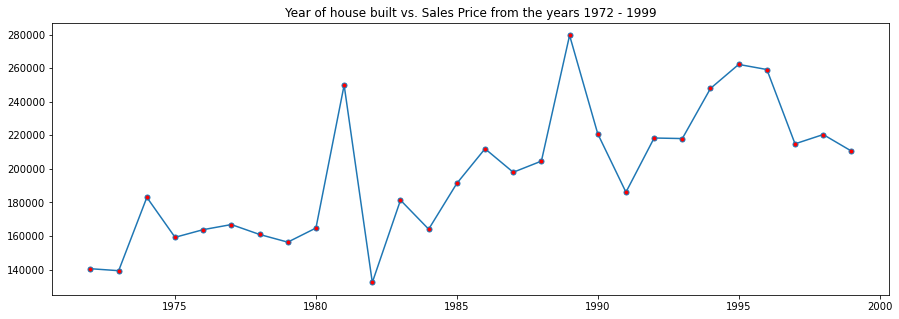

In [20]:
yearVsPrice(1972, 1999)

In [21]:
def areaVsPrice(r1, r2, prMin = False, prMax = False, size = (15,5), marker = ".", msize = 10, mfcolor = "red"):
    group = trainCsv.groupby("LotArea").mean()
    plt.figure(figsize = size)
    if prMin: print(group.index.min())
    if prMax: print(group.index.max())
    group = group[group.index > r1-1]
    group = group[group.index < r2+1]
    plt.plot(group.index, group["SalePrice"], marker = marker, markersize = msize, markerfacecolor = mfcolor)
    plt.title("Sales Price vs. Lot area of house ranging from ~ " + str(r1) + " - " + str(r2))
    if prMin: print(group.index.min())
    if prMax: print(group.index.max())

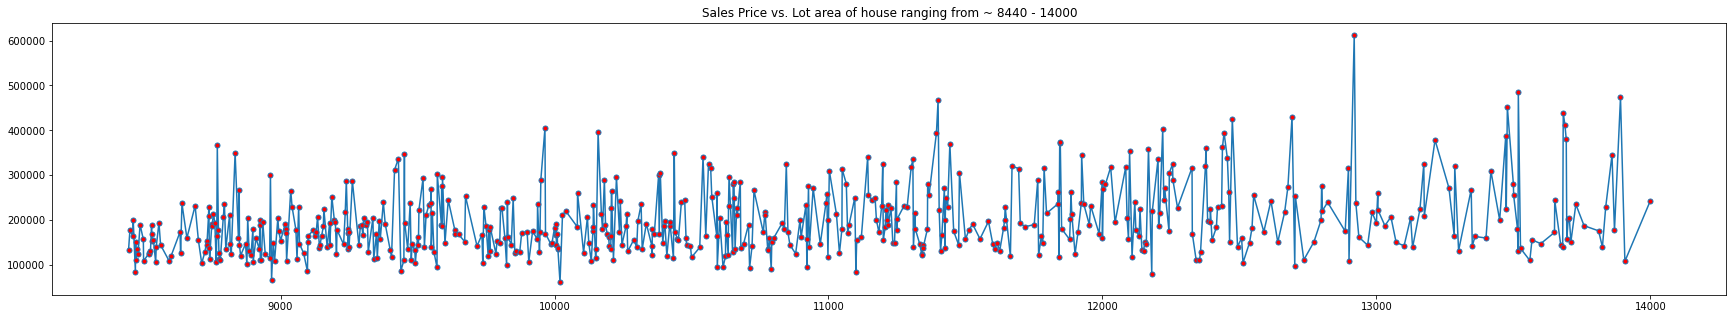

In [22]:
areaVsPrice(8440, 14000, size = (30,5))

1300
215245
8000
9000


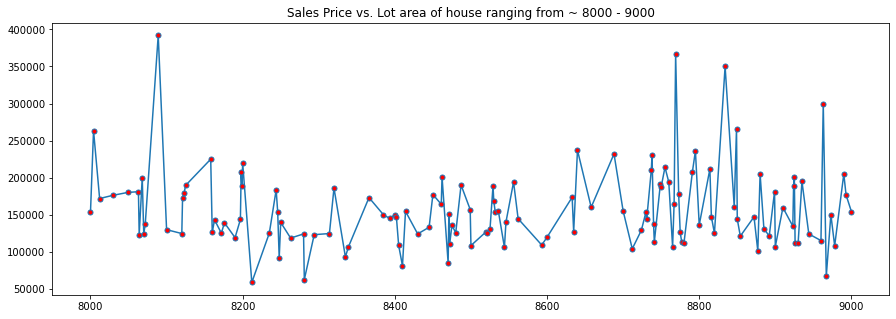

In [23]:
areaVsPrice(8000, 9000, True, True)

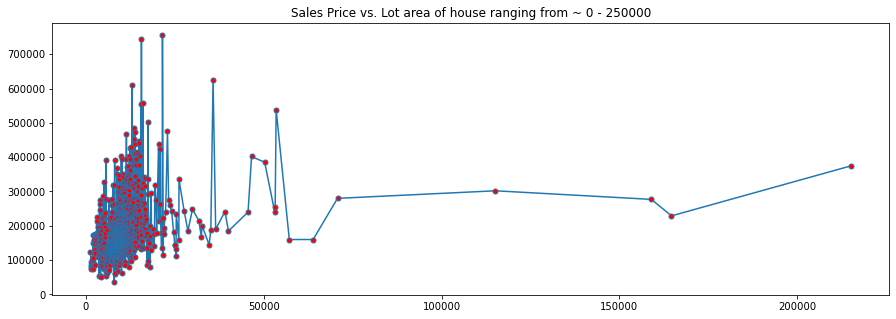

In [24]:
areaVsPrice(0, 250000)

In [25]:
grouped.describe()

,LotFrontage,LotArea,YearRemodAdd,GarageArea,ScreenPorch,PoolArea,YrSold,SalePrice
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,68.995267,10441.246796,1980.695283,427.467798,16.470965,2.564731,2007.872258,168213.487811
std,12.753865,3452.070854,14.074152,156.868127,28.309350,11.099034,0.551938,55775.657497
min,40.000000,4280.000000,1950.000000,0.000000,0.000000,0.000000,2006.750000,82666.666667
25%,59.500000,8334.950000,1970.651786,351.916667,0.000000,0.000000,2007.608333,131989.383333
50%,68.893617,10219.270000,1977.496753,420.600000,6.445652,0.000000,2007.833333,153620.133013
75%,76.404478,11568.028125,1992.141608,526.312500,25.269565,0.000000,2008.045767,201623.903409
max,121.000000,26519.000000,2010.000000,880.000000,205.000000,73.142857,2010.000000,394432.000000


In [26]:
grouped["areaToPriceRatio(x100)"] = grouped.apply(lambda x: (x["LotArea"]/x["SalePrice"])*100, axis = 1)

In [27]:
grouped

,LotFrontage,LotArea,YearRemodAdd,GarageArea,ScreenPorch,PoolArea,YrSold,SalePrice,areaToPriceRatio(x100)
YearBuilt,,,,,,,,,
1872,50.000000,5250.000000,1987.000000,0.000000,0.000000,0.000000,2008.000000,122000.000000,4.303279
1875,54.000000,6342.000000,1996.000000,0.000000,0.000000,0.000000,2010.000000,94000.000000,6.746809
1880,73.000000,12246.500000,1986.500000,544.750000,0.000000,0.000000,2007.500000,200619.750000,6.104334
1882,121.000000,17671.000000,1986.000000,424.000000,0.000000,0.000000,2009.000000,168000.000000,10.518452
1885,60.000000,11070.000000,1972.500000,416.500000,0.000000,0.000000,2008.500000,111250.000000,9.950562
...,...,...,...,...,...,...,...,...,...
2006,76.417910,10402.432836,2006.313433,677.537313,4.402985,0.000000,2006.970149,251775.447761,4.131631
2007,78.224490,10456.306122,2007.306122,678.040816,14.163265,0.000000,2007.836735,255362.734694,4.094688
2008,92.260870,14081.956522,2008.304348,855.130435,25.478261,20.869565,2008.826087,348849.130435,4.036690


In [28]:
grouped.columns

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'GarageArea', 'ScreenPorch',
       'PoolArea', 'YrSold', 'SalePrice', 'areaToPriceRatio(x100)'],
      dtype='object')

In [29]:
# Now we can easily get the data on the comparison area vs price and year built vs price with ANY range
# We can also get a ratio of the area to price
# we can get the graphs for the ranges of data too

In [30]:
np.where(grouped.corr()>0.5)

(array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6, 7, 7, 7, 8, 8]),
 array([0, 1, 0, 1, 8, 2, 3, 7, 2, 3, 7, 4, 5, 6, 2, 3, 7, 1, 8]))

In [81]:
grouped.reset_index(inplace = True)

In [119]:
corrs = {}

# for column in grouped.columns:
#     for col in grouped.columns:
#         if col != column:
#             correlation = grouped[col].corr(grouped[column])
#             corrs.append(correlation)

#optimized way: # when comparing items in a list with other items in the list itself then use range and indexes but if multiple lists then use comparisons
for column in range(len(grouped.columns) + 1):
    corrCols = []
    for i in range(column + 1, len(grouped.columns)):
        if grouped[grouped.columns[column]].corr(grouped[grouped.columns[i]]) > 0.1:
            corrCols.append(grouped.columns[i])
            corrs[grouped.columns[column]] = corrCols
#             print(grouped.columns[column], "-->", grouped.columns[i], "-->", grouped[grouped.columns[column]].corr(grouped[grouped.columns[i]]))
            
# what we have printed below, put the values in a dict. In the dict put the col name (col in outer loop) as the key and for value you put the list of columns
# col_nsme: [correlated column names]

corrs

{'YearBuilt': ['LotFrontage',
  'LotArea',
  'YearRemodAdd',
  'GarageArea',
  'SalePrice'],
 'LotFrontage': ['LotArea',
  'YearRemodAdd',
  'GarageArea',
  'ScreenPorch',
  'PoolArea',
  'SalePrice',
  'areaToPriceRatio(x100)'],
 'LotArea': ['YearRemodAdd',
  'GarageArea',
  'ScreenPorch',
  'PoolArea',
  'SalePrice',
  'areaToPriceRatio(x100)'],
 'YearRemodAdd': ['GarageArea', 'SalePrice'],
 'GarageArea': ['ScreenPorch', 'PoolArea', 'SalePrice'],
 'ScreenPorch': ['SalePrice'],
 'PoolArea': ['SalePrice']}

In [121]:
keysCorrs = list(corrs.keys())
keysCorrs

['YearBuilt',
 'LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'GarageArea',
 'ScreenPorch',
 'PoolArea']

In [125]:
neccGrouped = grouped[keysCorrs + ["SalePrice"]]

In [50]:
grouped['LotArea'].corr(grouped['YrSold'])

-0.18746978877249007

In [87]:
grouped.columns

Index(['YearBuilt', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'GarageArea',
       'ScreenPorch', 'PoolArea', 'YrSold', 'SalePrice',
       'areaToPriceRatio(x100)'],
      dtype='object')

<BarContainer object of 112 artists>

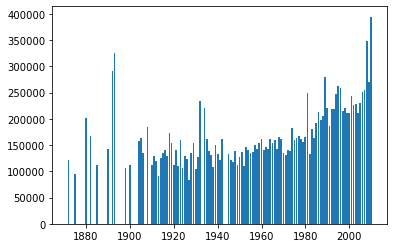

In [130]:
x = list(neccGrouped["YearBuilt"])
y = list(neccGrouped["SalePrice"])
plt.bar(x, y)

In [140]:
neccGrouped = neccGrouped.groupby(by = "YearBuilt").mean()

In [142]:
neccGrouped

,LotFrontage,LotArea,YearRemodAdd,GarageArea,ScreenPorch,PoolArea,SalePrice
YearBuilt,,,,,,,
1872,50.000000,5250.000000,1987.000000,0.000000,0.000000,0.000000,122000.000000
1875,54.000000,6342.000000,1996.000000,0.000000,0.000000,0.000000,94000.000000
1880,73.000000,12246.500000,1986.500000,544.750000,0.000000,0.000000,200619.750000
1882,121.000000,17671.000000,1986.000000,424.000000,0.000000,0.000000,168000.000000
1885,60.000000,11070.000000,1972.500000,416.500000,0.000000,0.000000,111250.000000
...,...,...,...,...,...,...,...
2006,76.417910,10402.432836,2006.313433,677.537313,4.402985,0.000000,251775.447761
2007,78.224490,10456.306122,2007.306122,678.040816,14.163265,0.000000,255362.734694
2008,92.260870,14081.956522,2008.304348,855.130435,25.478261,20.869565,348849.130435


<BarContainer object of 112 artists>

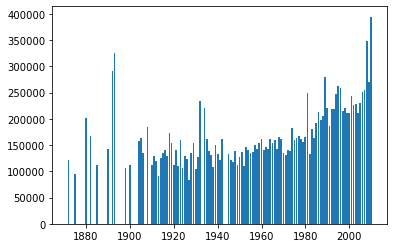

In [141]:
plt.bar(neccGrouped.index, neccGrouped['SalePrice'])

In [151]:
last20 = neccGrouped.tail(10)

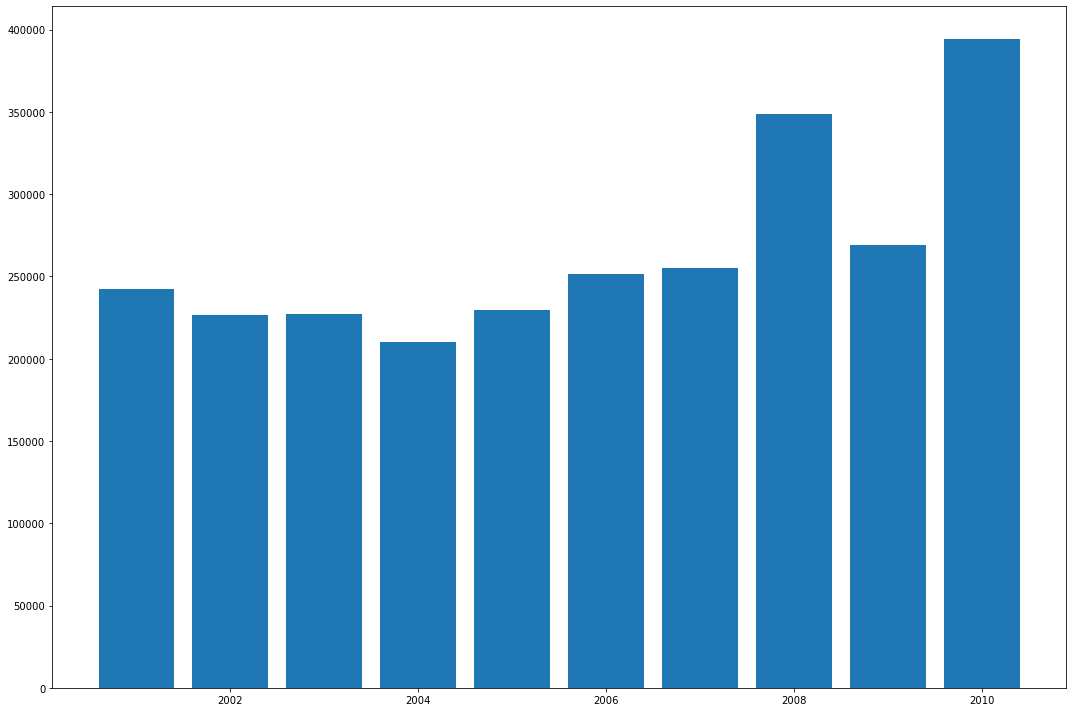

In [156]:
plt.figure(figsize = (15, 10))
plt.bar(list(last20.index.astype(int)), list(last20['SalePrice']))
plt.tight_layout()

,LotFrontage,LotArea,YearRemodAdd,GarageArea,ScreenPorch,PoolArea,SalePrice
YearBuilt,,,,,,,
2001,70.000000,10407.500000,2001.500000,621.450000,20.650000,0.000000,242630.000000
2002,79.200000,10723.260870,2002.173913,584.260870,0.000000,0.000000,226869.565217
2003,67.842105,9658.533333,2003.377778,568.800000,9.066667,0.000000,227408.577778
2004,68.787234,8526.259259,2004.462963,533.351852,12.018519,0.000000,210347.722222
2005,66.562500,9304.546875,2005.531250,580.218750,1.875000,0.000000,229680.953125
2006,76.417910,10402.432836,2006.313433,677.537313,4.402985,0.000000,251775.447761
2007,78.224490,10456.306122,2007.306122,678.040816,14.163265,0.000000,255362.734694
2008,92.260870,14081.956522,2008.304348,855.130435,25.478261,20.869565,348849.130435
2009,74.882353,8862.277778,2009.222222,613.333333,0.000000,0.000000,269220.000000


In [157]:
last20.to_csv("HousePriceSales.csv")

In [ ]:
#hw: revise ALL CONCEPTS AND NOTEBOOKS THOUROUGHLY